
Project on C02 Emission by Anil Sharma



DataSources:
Th two datasets are in a single link: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC



Here, I have WORLD C02 emission data of each day from 1960-2017.



The variables of the dataset are described below:



+ Country Name - Enlists the names of all the countries
+ Country Code - Three letter represntation of the countries
+ Indicator Name - Indicates the CO2 emissions in metric tons per capita
+ Indicator Code - Indicates the indicator code
+ Years(1960-2020) - Depicts the Carbon emissions for each country

The variables of the Metadata Country dataset are described below:


+ Country Code - Three letter represntation of the countries
+ Region - Enlists the continental region that a country falls under(divided across 7 categories)
+ IncomeGroup - Enlists the income bracket of all countries(divided across 4 categories)
+ SpecialNotes - For countries that do not fall under a region, special notes describes additional information about many fields.

Description of the project:


I have used two different datasets and merged the two datasets: Co2 emission from 1960-2017. I merged it with a second dataset which shows the region particular group of country is divided into:

What we aim to achieve from this plotting is the impact industrail revilution had on High income,Low income,Lower middle income, Upper middle income had on the nature since the inception and how much it diffrers between all of them.

We then plot the graphs for:
Visualising the CO2 emissions based on:
1.Region 
2.Income

In [195]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [196]:
#read the data files 
Co2_emmision=pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3638608.csv")
Region=pd.read_csv("Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3638608.csv")

In [197]:
#put all numeric missing values as zero
Co2_emmision.head()
Co2_emmision.fillna(value= 0,inplace= True)

In [198]:
#sample dat set 1
Co2_emmision.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


In [199]:
#sample data set 2
Region.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [200]:
#Removing columns we are not using.
df = Co2_emmision.merge(Region.rename({'Country Code': 'Country Code'}, axis=1),left_on='Country Code', right_on='Country Code', how='left')
#Data cleaning of the rows we are not using
co2df = df.drop(columns = ['Indicator Name','Indicator Code','TableName','Unnamed: 5','TableName','SpecialNotes'])

In [201]:
Regiondf=co2df.sort_values('Region')
IncomeGroupdf=co2df.sort_values('IncomeGroup')

In [202]:
# group by according to the plot we want to show
region = Regiondf.groupby(['Region']).sum()
income = Regiondf.groupby(['IncomeGroup']).sum()

In [203]:
# defining year for plot
year = []
for i in range(2019 - 1960):
    year.append(i+1960)
year = np.array(year)  

This shows thw co2 emission of the countries divided into different region and we make out that Europe and Cebtral Asia is responsible for double than other region in 1990

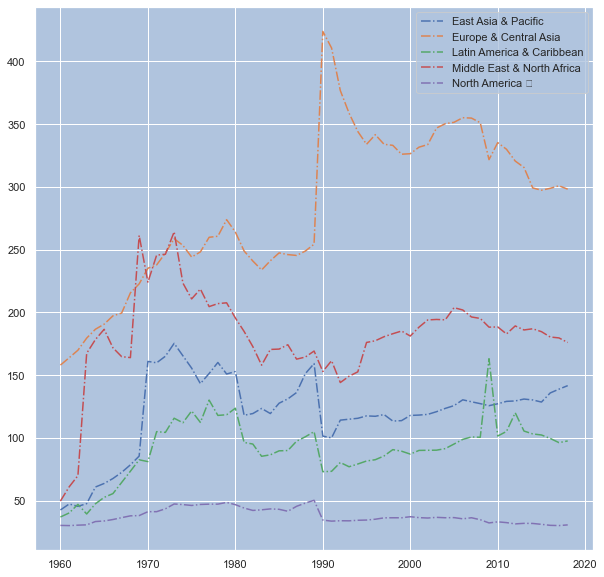

In [204]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
plt.plot(year,region.iloc[0,:], label = "East Asia & Pacific", linestyle="-.")
plt.plot(year,region.iloc[1,:], label = "Europe & Central Asia", linestyle="-.")
plt.plot(year,region.iloc[2,:], label = "Latin America & Caribbean", linestyle="-.")
plt.plot(year,region.iloc[3,:], label = "Middle East & North Africa", linestyle="-.")
plt.plot(year,region.iloc[4,:], label = "North America 	", linestyle="-.")
plt.legend()
plt.show()

In [205]:
income.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,258.516136,282.466234,298.636286,398.558687,434.604275,451.022446,444.587670,443.780402,465.462310,579.937736,...,585.462967,553.040479,541.845127,545.113791,529.848940,513.393220,507.277254,505.150233,505.307568,500.911975
Low income,4.477998,4.623770,5.005901,5.332989,5.883558,6.514512,7.019569,7.239368,8.311957,9.411145,...,9.463190,9.380536,8.671335,8.338981,7.295687,7.458903,6.853325,7.160186,6.964780,6.782088
Lower middle income,11.420230,11.598067,13.348445,13.672743,17.735410,18.517533,20.081428,20.284626,21.869441,22.106501,...,67.543461,66.184184,68.607094,69.981211,70.256459,70.435448,71.248172,74.466930,75.171231,77.533980
Upper middle income,47.473292,49.137991,51.290220,52.832104,57.585135,61.479761,66.994279,78.649012,88.924610,94.057312,...,216.596424,204.443703,208.737478,217.256295,211.101822,209.020345,206.902415,207.150008,208.145719,210.118883


Here we see that as expected the high income countries contribute more to C02 emission and we see in the recent year they are trying to get the emission down where as the upper middle income is on the rise.

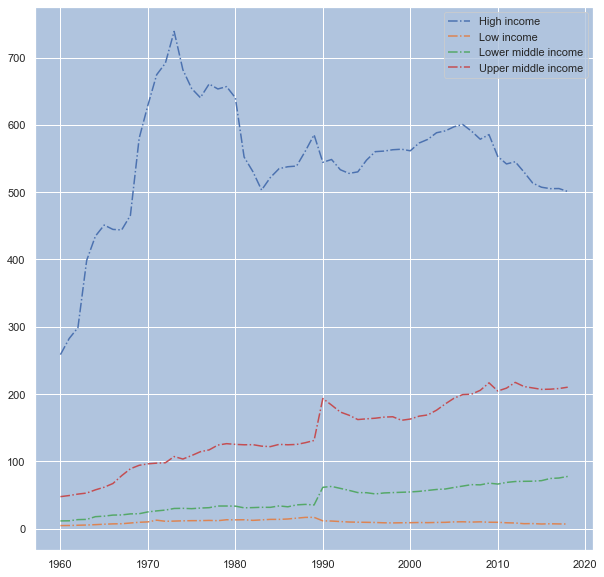

In [194]:
plt.figure(figsize=(10,10))
plt.plot(year,income.iloc[0,:], label = "High income", linestyle="-.")
plt.plot(year,income.iloc[1,:], label = "Low income", linestyle="-.")
plt.plot(year,income.iloc[2,:], label = "Lower middle income", linestyle="-.")
plt.plot(year,income.iloc[3,:], label = "Upper middle income", linestyle="-.")
plt.legend()
plt.show()